# [Machine Learning](https://github.com/frolovilya/machine-learning) / Principal Component Analysis

> See sources
> * [pca.py](https://github.com/frolovilya/machine-learning/blob/master/pca.py)
> * [images.py](https://github.com/frolovilya/machine-learning/blob/master/images.py)
> * [utils.py](https://github.com/frolovilya/machine-learning/blob/master/utils.py)

Reducing number of data dimensions $x^{(i)} \in R^n$ &rarr; $R^k$, where $k < n$.

Calculating covariance matrix:

$$\Sigma = \frac{1}{m}X^T X$$

Given that X shape is $m x n$, resulting $\Sigma$ is a $n x n$ square matrix of covariances between features.

Getting first $k$ eigenvectors of $\Sigma$ reduces original data dimension to $R^k$.

In [2]:
# import libs
import sys
sys.path.append("../")

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from pca import *
from images import *
import random
from utils import *

In [3]:
def load_data():
    return scipy.io.loadmat('../data/ex7data1.mat')

data = load_data()
x = normalize_variable(data['X'])[0]
print(x.shape)

(50, 2)


Calculate eigenvectors such as _v[:, i]_ eigenvector column corresponds to _w[i]_ eigenvalue.

In [4]:
# find principal components
w, v = find_eig_vectors(x)
print("values\n", w)
print("vectors\n", v)

values
 [1.73553038 0.26446962]
vectors
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


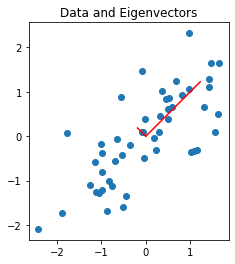

In [5]:
# plot data and eigenvectors
def plot_data(show_vectors=False):
    plt.scatter(x[:, 0], x[:, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    if (show_vectors):
        plt.plot((0, v[0, 0] * w[0]), (0, v[1, 0] * w[0]), "-r")
        plt.plot((0, v[0, 1] * w[1]), (0, v[1, 1] * w[1]), "-r")
    plt.title("Data and Eigenvectors")
    

plot_data(show_vectors=True)
plt.show()

## Projecting Data To Principal Components

In order to get $X_{k-projection} \in R^k$, need to take the first $k$ eigenvectors and project the data onto it:

$$X_{k-projection} = X V_k$$

Data can be recovered back to $R^n$ by the following:

$$X' = X_{k-projection} V_k$$ 

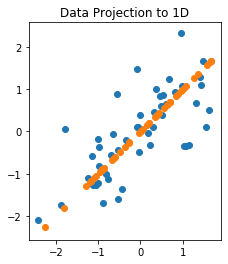

In [6]:
# project data from 2d to 1d and recover back
x_1d = project_data(x, v, 1)
x_2d = recover_data(x_1d, v)


def plot_data_projection():
    plt.scatter(x_2d[:, 0], x_2d[:, 1], marker="o")
    plt.title("Data Projection to 1D")

    
plot_data()
plot_data_projection()
plt.show()

## Faces Dataset

Reducing number of dimensions from $R^{1024}$ to speed up learning algorithms.

In [7]:
def load_faces_dataset():
    return scipy.io.loadmat('../data/ex7faces.mat')['X']


faces = load_faces_dataset()
print(faces.shape)

(5000, 1024)


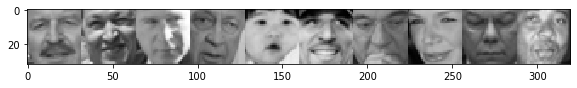

In [8]:
# show random images
random_indexes = [random.randint(0, faces.shape[0]) for i in range(10)]
random_faces = np.hstack([vector_to_square_image(faces[i, :]) for i in random_indexes])  # 32 x 320

plot_image(random_faces)

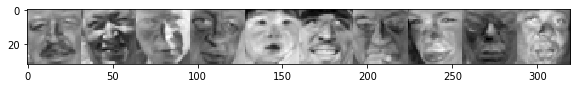

In [9]:
# reduce number of dimensions from 1024 to 100
normalized_faces = normalize_variable(faces[random_indexes, :])[0]
wf, vf = find_eig_vectors(normalized_faces)

reduced_faces = project_data(normalized_faces, vf, 100)
recovered_faces = recover_data(reduced_faces, vf)

recovered_random_faces = np.hstack([vector_to_square_image(recovered_faces[i, :]) 
                                    for i in range(recovered_faces.shape[0])])  # 32 x 320

plot_image(recovered_random_faces.real)